In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [13]:
df = pd.read_csv('data/data.csv')
df.shape

(30557, 82)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30557 entries, 0 to 30556
Data columns (total 82 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Place_ID X Date                                      30557 non-null  object 
 1   Date                                                 30557 non-null  object 
 2   Place_ID                                             30557 non-null  object 
 3   target                                               30557 non-null  float64
 4   target_min                                           30557 non-null  float64
 5   target_max                                           30557 non-null  float64
 6   target_variance                                      30557 non-null  float64
 7   target_count                                         30557 non-null  int64  
 8   precipitable_water_entire_atmosphere                 30557 non-nul

In [15]:
df.head()

,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,...,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
0,010Q650 X 2020-01-02,2020-01-02,010Q650,38.0,23.0,53.0,769.50,92,11.000000,60.200001,...,38.593017,-61.752587,22.363665,1793.793579,3227.855469,0.010579,74.481049,37.501499,-62.142639,22.545118
1,010Q650 X 2020-01-03,2020-01-03,010Q650,39.0,25.0,63.0,1319.85,91,14.600000,48.799999,...,59.624912,-67.693509,28.614804,1789.960449,3384.226562,0.015104,75.630043,55.657486,-53.868134,19.293652
2,010Q650 X 2020-01-04,2020-01-04,010Q650,24.0,8.0,56.0,1181.96,96,16.400000,33.400002,...,49.839714,-78.342701,34.296977,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,010Q650 X 2020-01-05,2020-01-05,010Q650,49.0,10.0,55.0,1113.67,96,6.911948,21.300001,...,29.181258,-73.896588,30.545446,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,010Q650 X 2020-01-06,2020-01-06,010Q650,21.0,9.0,52.0,1164.82,95,13.900001,44.700001,...,0.797294,-68.612480,26.899694,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
for col in df.columns:
    if 'angle' in col or 'amf' in col[-3:]:
        df.drop([col], axis=1, inplace=True)

drop_cols = ['L3_CH4_CH4_column_volume_mixing_ratio_dry_air', 'L3_CH4_aerosol_height', 'L3_CH4_aerosol_optical_depth']
df.drop(drop_cols, axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30557 entries, 0 to 30556
Data columns (total 45 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Place_ID X Date                                  30557 non-null  object 
 1   Date                                             30557 non-null  object 
 2   Place_ID                                         30557 non-null  object 
 3   target                                           30557 non-null  float64
 4   target_min                                       30557 non-null  float64
 5   target_max                                       30557 non-null  float64
 6   target_variance                                  30557 non-null  float64
 7   target_count                                     30557 non-null  int64  
 8   precipitable_water_entire_atmosphere             30557 non-null  float64
 9   relative_humidity_2m_above_g

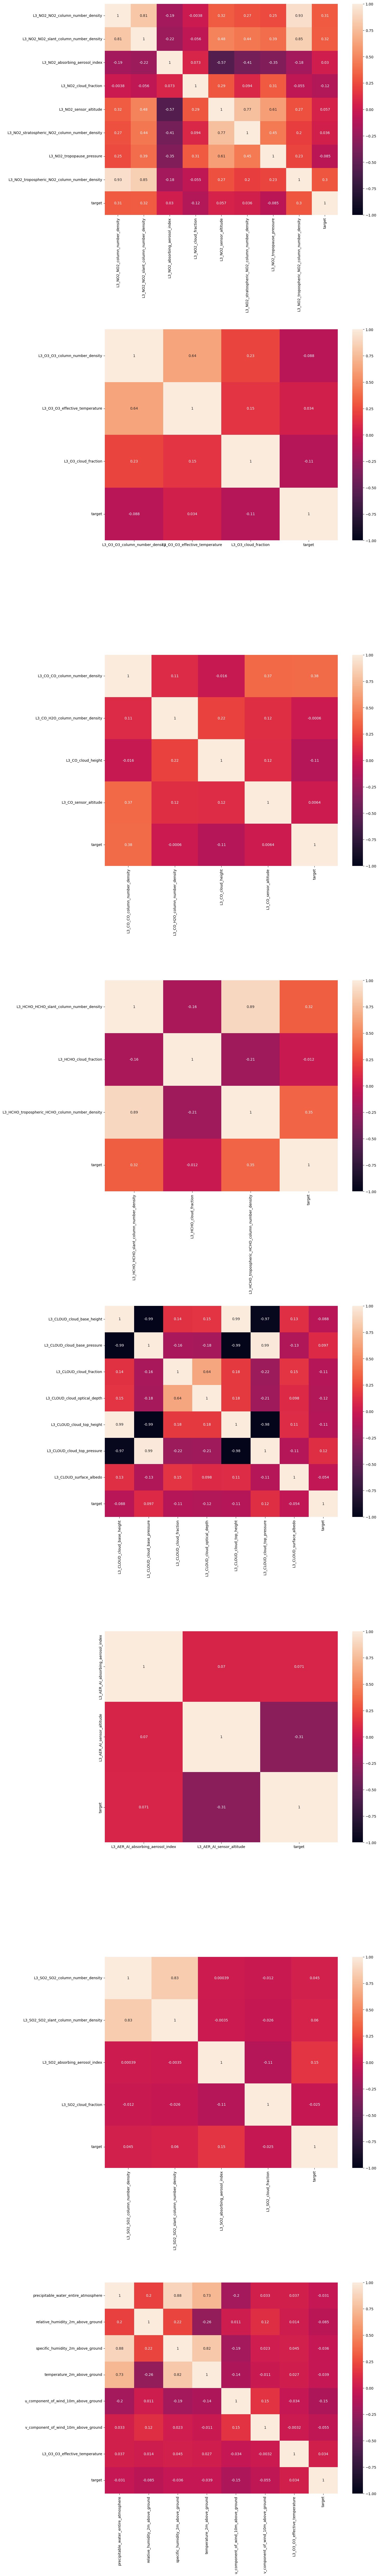

In [17]:
gases = ['NO2', 'O3', 'CO', 'HCHO', 'CLOUD', 'AER', 'SO2']

fig, axes = plt.subplots(len(gases)+1, 1, figsize=(16, 100))
axes = axes.flatten()

for ax, gas in zip(axes, gases):
    col_keeps = [col for col in df.columns if gas in col]
    corr_gas = df[col_keeps + ['target']]
    sns.heatmap(corr_gas.corr(), annot=True, ax=ax, vmin=-1, vmax=1)

weather = ['humidity', 'wind', 'water', 'temperature']

col_keeps = [col for col in df.columns for w in weather if w in col]
corr_weather = df[col_keeps + ['target']]
sns.heatmap(corr_weather.corr(), annot=True, ax=axes[-1], vmin=-1, vmax=1)

plt.tight_layout(pad = 3)

In [18]:
use = list(df.columns[8:]) + ['target']
corr_df = df[use].corr().abs()

upper_tri = corr_df.where(np.triu(np.ones(corr_df.shape), k=1).astype(bool))

threshold = 0.7
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > threshold)]
print(f'Columns to drop [{len(to_drop)}]:', to_drop)

df.drop(to_drop, axis=1, inplace=True)
df.info()

Columns to drop [18]: ['specific_humidity_2m_above_ground', 'temperature_2m_above_ground', 'L3_NO2_NO2_slant_column_number_density', 'L3_NO2_stratospheric_NO2_column_number_density', 'L3_NO2_tropospheric_NO2_column_number_density', 'L3_O3_cloud_fraction', 'L3_CO_H2O_column_number_density', 'L3_CO_sensor_altitude', 'L3_HCHO_cloud_fraction', 'L3_HCHO_tropospheric_HCHO_column_number_density', 'L3_CLOUD_cloud_base_pressure', 'L3_CLOUD_cloud_fraction', 'L3_CLOUD_cloud_top_height', 'L3_CLOUD_cloud_top_pressure', 'L3_AER_AI_absorbing_aerosol_index', 'L3_SO2_SO2_slant_column_number_density', 'L3_SO2_absorbing_aerosol_index', 'L3_SO2_cloud_fraction']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30557 entries, 0 to 30556
Data columns (total 27 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Place_ID X Date                           30557 non-null  object 
 1   Date                   

In [19]:
df.duplicated().value_counts()

False    30557
Name: count, dtype: int64

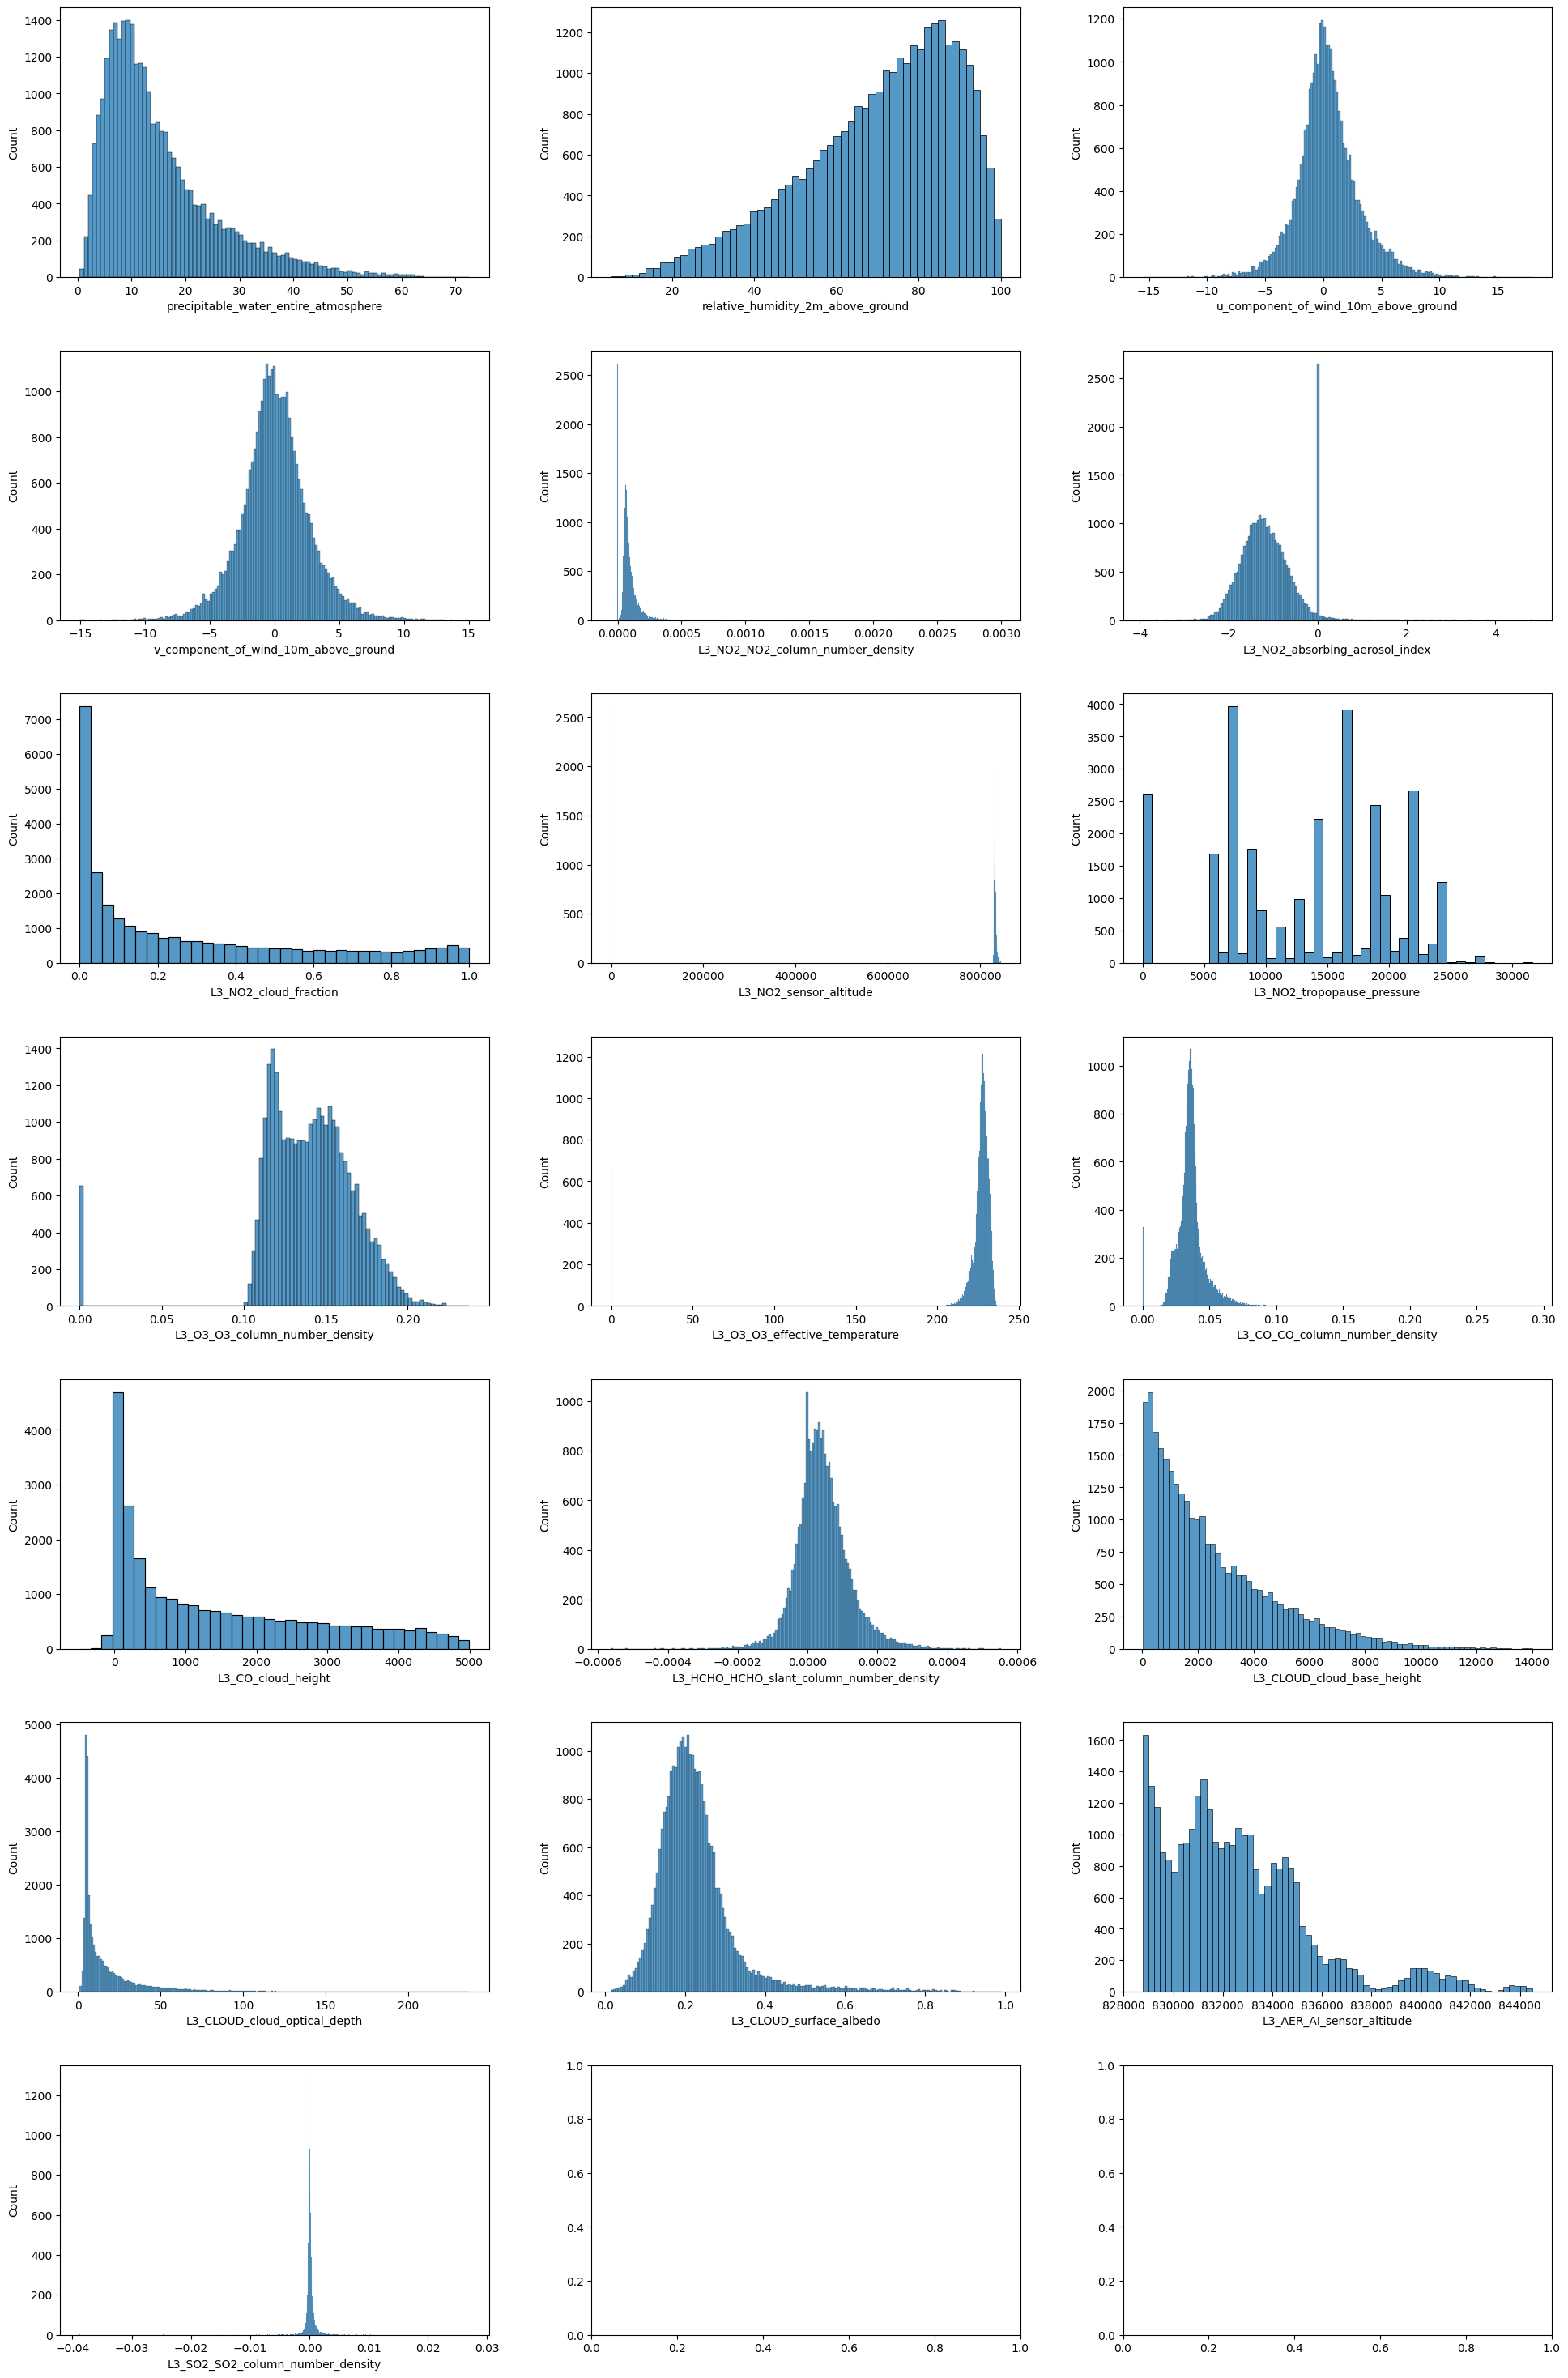

In [20]:
fix, axes = plt.subplots(7, 3, figsize=(20, 30))
axes = axes.flatten()

for ax, col in zip(axes, df.columns[8:]):
    sns.histplot(df, x=col, ax=ax)

plt.tight_layout(pad=3)

In [21]:
for col in df.columns[8:]:
    print(f'''{col}
min, mean, max:           {df[col].min().round(3)}   {df[col].mean().round(3)}   {df[col].max().round(3)}
quantiles (25, 50, 75):   {df[col].quantile(0.25).round(3)}   {df[col].quantile(0.50).round(3)}   {df[col].quantile(0.75).round(3)}\n''')

precipitable_water_entire_atmosphere
min, mean, max:           0.42   15.302   72.6
quantiles (25, 50, 75):   7.667   12.2   19.9

relative_humidity_2m_above_ground
min, mean, max:           5.129   70.553   100.0
quantiles (25, 50, 75):   58.6   74.1   85.45

u_component_of_wind_10m_above_ground
min, mean, max:           -15.56   0.417   17.955
quantiles (25, 50, 75):   -1.098   0.222   1.773

v_component_of_wind_10m_above_ground
min, mean, max:           -15.024   0.088   15.056
quantiles (25, 50, 75):   -1.416   0.013   1.556

L3_NO2_NO2_column_number_density
min, mean, max:           -0.0   0.0   0.003
quantiles (25, 50, 75):   0.0   0.0   0.0

L3_NO2_absorbing_aerosol_index
min, mean, max:           -3.942   -1.094   4.825
quantiles (25, 50, 75):   -1.515   -1.168   -0.743

L3_NO2_cloud_fraction
min, mean, max:           0.0   0.278   1.0
quantiles (25, 50, 75):   0.026   0.149   0.47

L3_NO2_sensor_altitude
min, mean, max:           0.0   755880.302   844493.898
quantiles (25, 50

<Axes: xlabel='L3_CO_CO_column_number_density', ylabel='target'>

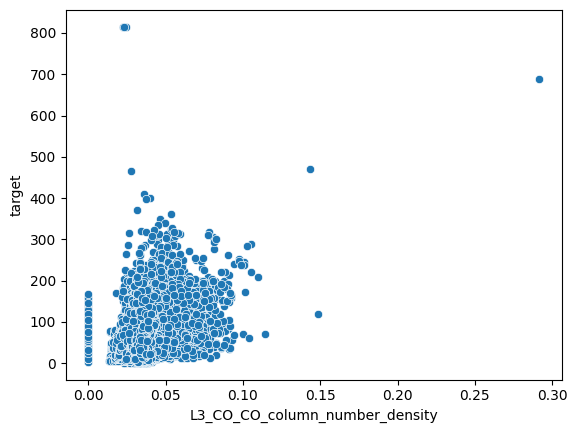

In [22]:
# baseline model based on strongest correlation to target: (?)
sns.scatterplot(df, x='L3_CO_CO_column_number_density', y='target')